In [176]:
import numpy as np
import pandas as pd
import scipy as sp
import plotly.express as px
import networkx as nx
import degroot as dg
import copy
from tqdm import tqdm
import plotly.graph_objects as go
from joblib import Parallel, delayed

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
dims = 12
niter_degroot = 1
nsim = 1000

In [190]:
correct_belief = 0.8
confident_agent = 0.1
other_belief = 0.2
init_beliefs ={
    '0': np.random.uniform(correct_belief-confident_agent, correct_belief+confident_agent),
    '1': np.random.uniform(correct_belief-confident_agent, correct_belief+confident_agent),
    '2': np.random.uniform(correct_belief-confident_agent, correct_belief+confident_agent),
    '3': np.random.uniform(0, 1),
    '4': np.random.uniform(0, 1),
    '5': np.random.uniform(0, 1),
    '6': np.random.uniform(0, 1),
    '7': np.random.uniform(0, 1),
    '8': np.random.uniform(0, 1),
    '9': np.random.uniform(other_belief - confident_agent, other_belief + confident_agent),
    '10': np.random.uniform(other_belief - confident_agent, other_belief + confident_agent),
    '11': np.random.uniform(other_belief - confident_agent, other_belief + confident_agent)
}
init_beliefs

{'0': 0.8103897018875349,
 '1': 0.7738624855919882,
 '2': 0.8862789438273768,
 '3': 0.10254633087092013,
 '4': 0.17552489537830251,
 '5': 0.5195018031820234,
 '6': 0.6978996076652337,
 '7': 0.05343203299689414,
 '8': 0.024928158078733498,
 '9': 0.14173537149488458,
 '10': 0.20659742336461306,
 '11': 0.19529564557525786}

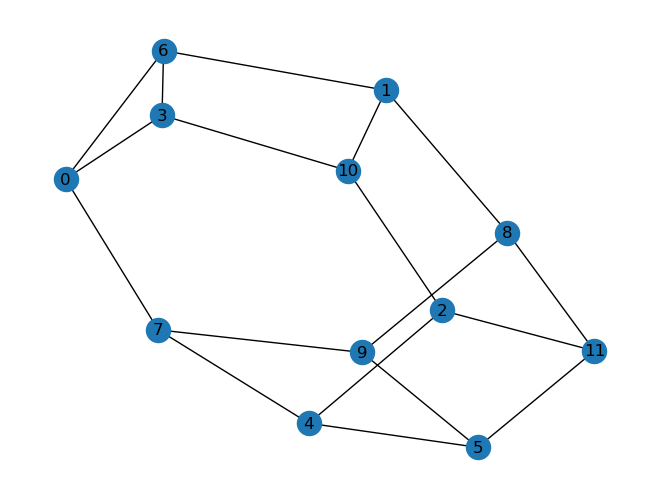

In [191]:
n = nx.random_regular_graph(d=3, n=dims)
nx.draw(n, with_labels=True)

In [212]:
m0 = nx.adjacency_matrix(n).todense()
initial_belief = np.array(list(init_beliefs.values()))
niter_search = 100
max_edge_values = 5
res = dg.myopic_search(m0=nx.adjacency_matrix(n).todense(), niter_search=niter_search, max_edge_value=max_edge_values, initial_belief=initial_belief, correct_belief=correct_belief, niter_degroot=niter_degroot, symmetric=False)

21

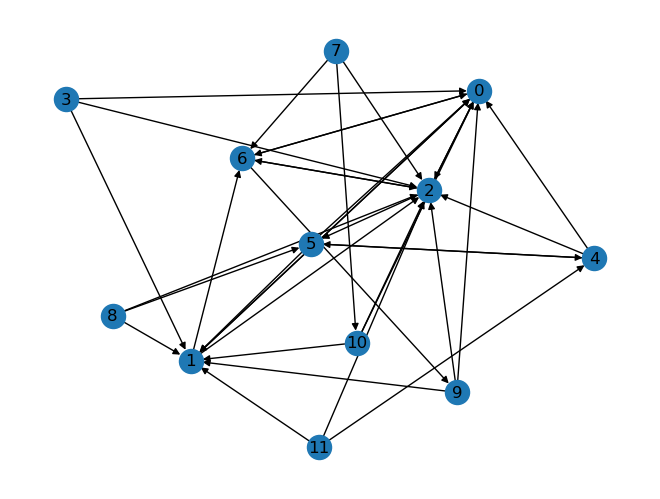

In [213]:
nx.draw(nx.from_numpy_array(res.m, create_using=nx.DiGraph), with_labels=True)
res.iterations

In [175]:
adj = nx.adjacency_matrix(n).todense()
err, final_belief = dg.degroot_err(adj, np.array(list(init_beliefs.values())), correct_belief, niter_degroot)
err, final_belief, np.mean(final_belief)

(0.2893689895113424,
 array([0.43301199, 0.75332526, 0.44801583, 0.70115481, 0.36656734,
        0.39028894, 0.70641156, 0.41702066, 0.5417899 , 0.50986881,
        0.30226368, 0.55785334]),
 0.5106310104886577)

In [109]:
erdos_reni_p = 0.2
errors = []
for i in range(nsim):
    network = nx.erdos_renyi_graph(n=dims, p=erdos_reni_p)
    adj = nx.adjacency_matrix(network).todense()
    err, final_belief = dg.degroot_err(adj, init_belief, correct_belief, niter_degroot)
    errors.append(err)

hist, bins = np.histogram(errors, bins=20) 
print(np.mean(errors), np.std(errors))
px.bar(x=bins[1:], y=hist, labels={'x':'Error', 'y':'Frequency'})

0.17774698672077435 0.05215709160869893


In [110]:
barabasi_albert_m = 2
errors = []
for i in range(nsim):
    network = nx.barabasi_albert_graph(n=dims, m=barabasi_albert_m)
    adj = nx.adjacency_matrix(network).todense()
    err, final_belief = dg.degroot_err(adj, init_belief, correct_belief, niter_degroot)
    errors.append(err)

hist, bins = np.histogram(errors, bins=20) 
print(np.mean(errors), np.std(errors))
px.bar(x=bins[1:], y=hist, labels={'x':'Error', 'y':'Frequency'})

0.22877667329518686 0.02200346110625076


In [104]:
n_cliques = 2
errors = []
for i in range(nsim):
    network = nx.connected_caveman_graph(l=n_cliques, k=dims//n_cliques)
    adj = nx.adjacency_matrix(network).todense()
    err, final_belief = dg.degroot_err(adj, init_belief, correct_belief, niter_degroot)
    errors.append(err)

hist, bins = np.histogram(errors, bins=20) 
print(np.mean(errors), np.std(errors))
px.bar(x=bins[1:], y=hist, labels={'x':'Error', 'y':'Frequency'})

0.021930142608144024 3.469446951953614e-18


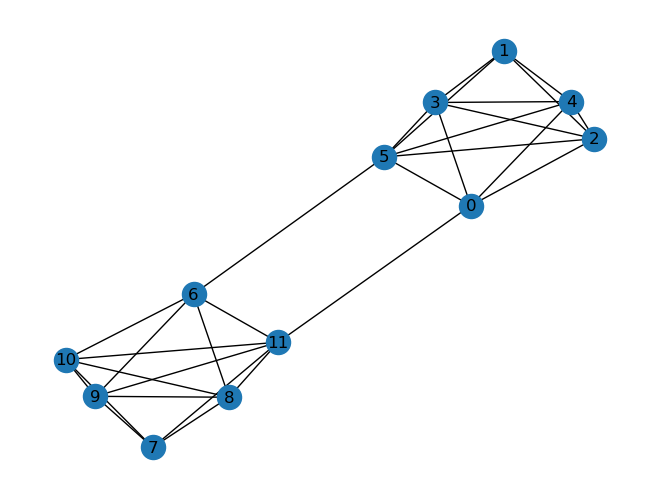

In [102]:
nx.draw(network, with_labels=True)